In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees, pearson
import seaborn
import pandas as pd

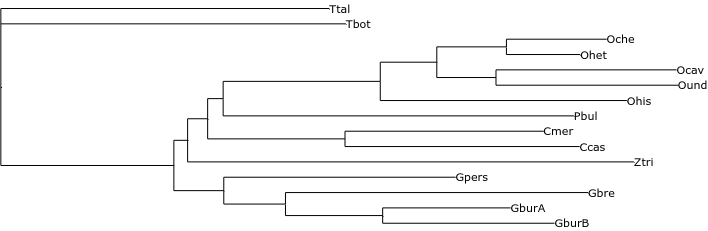

In [3]:
from ete2 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 5000
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

ete_tree = Tree( 'gopher.tree' )

for node in ete_tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ').replace('\'','') )
        tf.fsize = 10
        tf.hz_align = 100
        node.add_face( tf, 0 )

ete_tree.render("%%inline", w=200, units="mm", tree_style=ts)

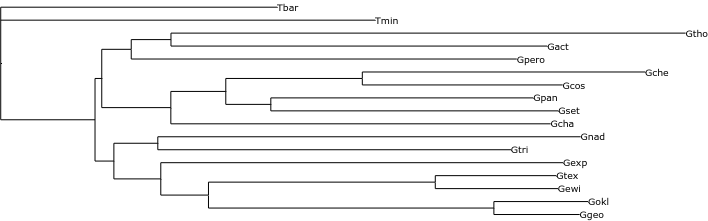

In [4]:
from ete2 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 5000
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

ete_tree = Tree( 'lice.tree' )

for node in ete_tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ').replace('\'','') )
        tf.fsize = 10
        tf.hz_align = 100
        node.add_face( tf, 0 )

ete_tree.render("%%inline", w=200, units="mm", tree_style=ts)

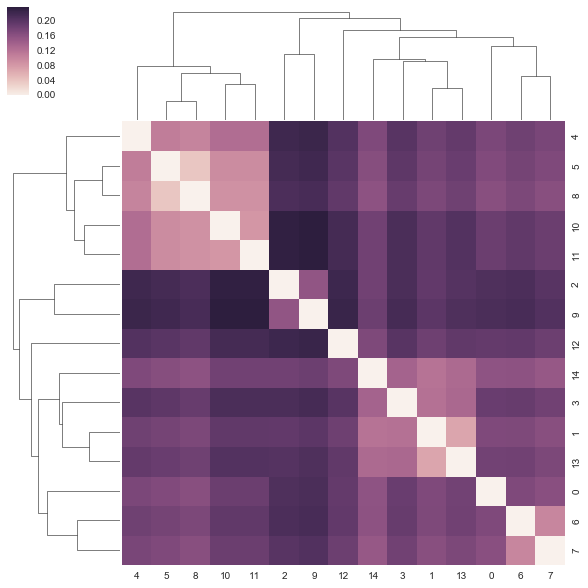

In [5]:
T1 = SuchTree( 'gopher.tree' )
D1 = zeros( ( len(T1.leafs),len(T1.leafs) ) )
for i,a in enumerate(T1.leafs.values()) :
    for j,b in enumerate( T1.leafs.values() ) :
        D1[i,j] = T1.distance( a, b )
seaborn.clustermap(D1)

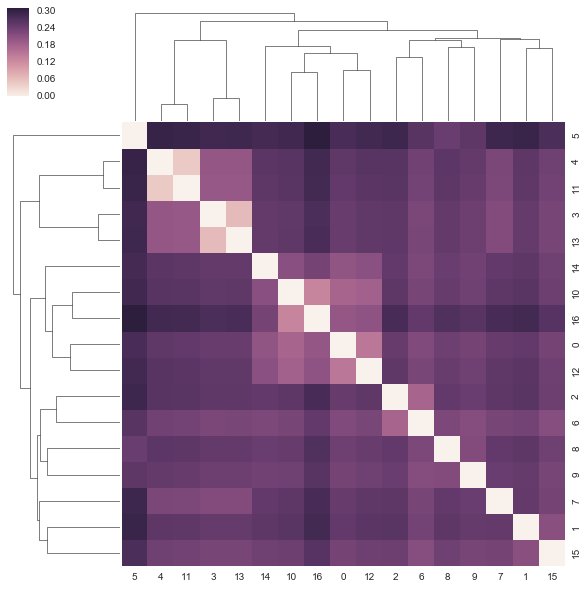

In [6]:
T2 = SuchTree( 'lice.tree' )
D2 = zeros( ( len(T2.leafs),len(T2.leafs) ) )
for i,a in enumerate(T2.leafs.values()) :
    for j,b in enumerate( T2.leafs.values() ) :
        D2[i,j] = T2.distance( a, b )
seaborn.clustermap(D2)

In [7]:
links = pd.DataFrame.from_csv( 'gopher-louse-associations.txt' )
links

,Gset,Gpan,Gche,Gcos,Gcha,Ggeo,Gokl,Gewi,Gtex,Gexp,Gact,Gpero,Gtho,Gtri,Gnad,Tmin,Tbar
GburA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
GburB,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Gbre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Gpers,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Ound,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ocav,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Oche,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ohet,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Ohis,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Pbul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
SLT = SuchLinkedTrees( T1, T2, links )

139820938546784 allocating columns in 2573192824
bulding default subset.
bulding default link list.


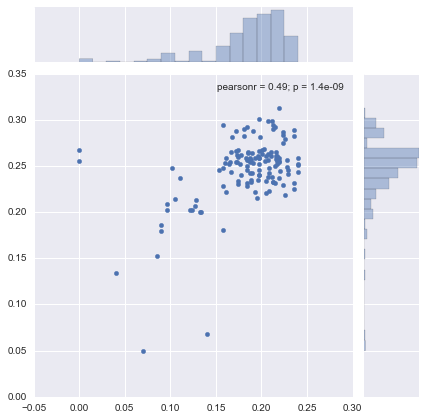

In [9]:
result = SLT.linked_distances()
seaborn.jointplot( result['TreeA'], result['TreeB'] )

In [10]:
from scipy.stats import kendalltau, pearsonr
print kendalltau( result['TreeA'], result['TreeB'] )
print pearsonr( result['TreeA'], result['TreeB'] )

KendalltauResult(correlation=0.20975684102929301, pvalue=0.00029167123165993626)
(0.49018498968585178, 1.3847762345214803e-09)


In [11]:
from skbio import TreeNode

t1 = TreeNode.read( 'gopher.tree' )
t2 = TreeNode.read( 'lice.tree' )

d1 = t1.tip_tip_distances()
d2 = t2.tip_tip_distances()

In [12]:
from itertools import combinations

l = links.unstack()
l = l[l>0]

d_host = []
p_host = []
d_lice = []
p_lice = []
for (a,b),(c,d) in combinations( l.index, 2 ) :
    B,D = map( d1.ids.index, [b,d] )
    A,C = map( d2.ids.index, [a,c] )
    d_host.append( d1[B,D] )
    d_lice.append( d2[A,C] )
    p_host.append( (b,d) )
    p_lice.append( (a,c) )

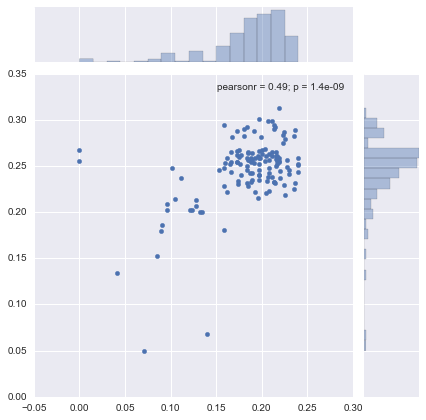

In [13]:
seaborn.jointplot( array(d_host), array(d_lice) )

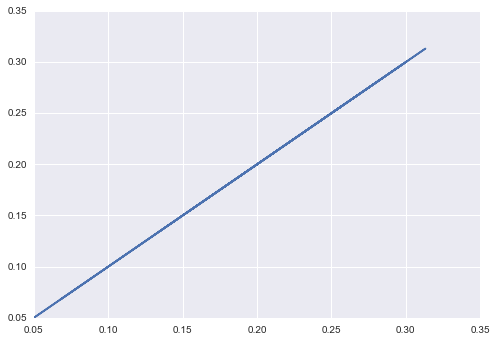

In [14]:
d_st, d_sb = [],[]
for a,b in combinations( T2.leafs.keys(), 2 ) :
    d_st.append( T2.distance( a, b ) )
    A, B = map( d2.ids.index, [a,b] )
    d_sb.append( d2[ A, B ] )
plot( d_st, d_sb )

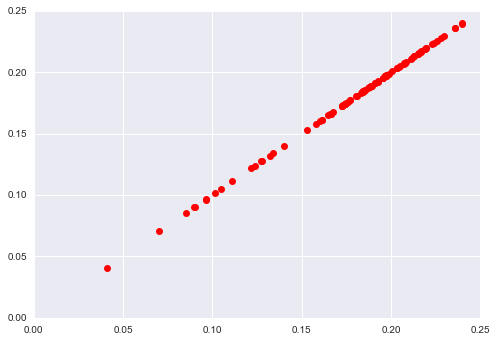

In [15]:
d_st, d_sb = [],[]
d = []
for a,b in combinations( T1.leafs.keys(), 2 ) :
    d.append( map( lambda x : T1.leafs[x], ( a, b ) ) ) 
    A, B = map( d1.ids.index, [a,b] )
    d_sb.append( d1[ A, B ] )
d_st = T1.distances( array(d) )
plot( d_st, d_sb, 'ro' )

In [16]:
p_host_ids = map( lambda x:(T1.leafs[x[0]],T1.leafs[x[1]]), p_host )
p_lice_ids = map( lambda x:(T2.leafs[x[0]],T2.leafs[x[1]]), p_lice )

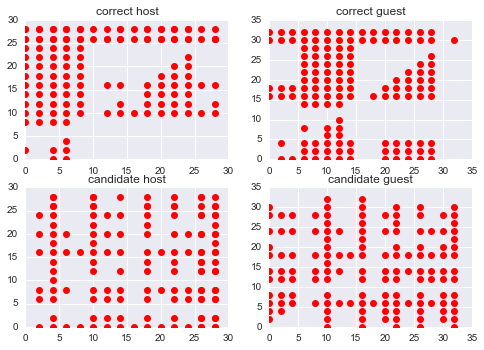

In [17]:
subplot(2,2,1)
title( 'correct host' )
a,b = zip(*p_host_ids)
plot(a,b, 'ro')
subplot(2,2,2)
title( 'correct guest' )
a,b = zip(*p_lice_ids)
plot(a,b, 'ro')
subplot(2,2,3)
a,b = zip(*result['ids_A'])
title( 'candidate host' )
plot(a,b, 'ro')
subplot(2,2,4)
a,b = zip(*result['ids_B'])
title( 'candidate guest' )
plot(a,b, 'ro')

In [18]:
links.T.reindex( SLT.col_names )

,GburA,GburB,Gbre,Gpers,Ound,Ocav,Oche,Ohet,Ohis,Pbul,Ccas,Cmer,Ztri,Tbot,Ttal
Gpan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Gnad,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Tmin,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Gtex,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Gokl,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gtho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Tbar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Gexp,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Gact,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Gpero,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
SLT.linklist

array([[10,  4],
       [16, 10],
       [32, 28],
       [22, 18],
       [26, 22],
       [ 0, 26],
       [30, 26],
       [20, 14],
       [ 2, 28],
       [ 4, 12],
       [ 8,  2],
       [28, 24],
       [12,  6],
       [24, 20],
       [14,  8],
       [18, 16],
       [ 6,  0]])

In [20]:
ndarray( (SLT.subset_a_size, SLT.subset_b_size) ).shape

(15, 17)

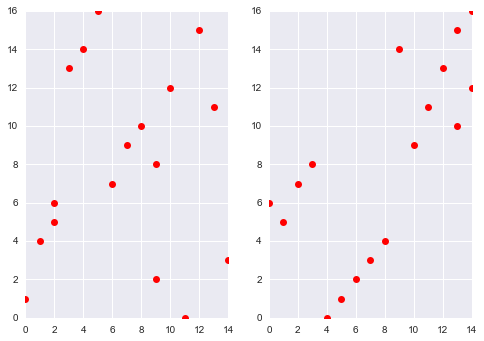

In [21]:
subplot(1,2,1)
for i in xrange( SLT.linkmatrix.shape[0] ) :
    for j in xrange( SLT.linkmatrix.shape[1] ) :
        if SLT.linkmatrix[i,j] : plot( [i], [j], 'ro' )
subplot(1,2,2)
for i in xrange( SLT.linkmatrix.shape[0] ) :
    for j in xrange( SLT.linkmatrix.shape[1] ) :
        if bool( links.values[i,j] ) : plot( [i], [j], 'ro' )
        

In [22]:
subplot(1,2,1)
for i in SLT.row_names :
    for j in SLT.col_names :
        
subplot(1,2,2)
for i in xrange( SLT.linkmatrix.shape[0] ) :
    for j in xrange( SLT.linkmatrix.shape[1] ) :
        if bool( links.values[i,j] ) : plot( [i], [j], 'ro' )

IndentationError: expected an indented block (<ipython-input-22-ea19e58de4f1>, line 5)

In [12]:
from scipy.stats import kendalltau

kendalltau( result['TreeA'], result['TreeB'] )

KendalltauResult(correlation=0.20975684102929301, pvalue=0.00029167123165993626)

In [ ]:
SLT.col_ids